**1.** (10 points)

Use loop to generate the 12 by 12 times table. Compile and run. You don't have to worry much about formatting, but the output should have 12 rows with numbers separated by spaces.

In [1]:
%%file e1.cpp

#include <iostream>
using std::cout;

int main() {
    for (int i=1; i<=12; i++) {
        for (int j=1; j<=12; j++) {
            cout << i*j << "\t";
        }
        cout << "\n";
    }
}

Overwriting e1.cpp


In [2]:
%%bash

g++ -o e1.exe e1.cpp

In [3]:
%%bash

./e1.exe

1	2	3	4	5	6	7	8	9	10	11	12	
2	4	6	8	10	12	14	16	18	20	22	24	
3	6	9	12	15	18	21	24	27	30	33	36	
4	8	12	16	20	24	28	32	36	40	44	48	
5	10	15	20	25	30	35	40	45	50	55	60	
6	12	18	24	30	36	42	48	54	60	66	72	
7	14	21	28	35	42	49	56	63	70	77	84	
8	16	24	32	40	48	56	64	72	80	88	96	
9	18	27	36	45	54	63	72	81	90	99	108	
10	20	30	40	50	60	70	80	90	100	110	120	
11	22	33	44	55	66	77	88	99	110	121	132	
12	24	36	48	60	72	84	96	108	120	132	144	


**2.** (10 points)
 
Write a function that takes a vector of doubles  returns the squared vector. Compile and run the function with the initial vector containing 1.0, 2.0, 3.0, 4.0, 5.0.

In [4]:
%%file e2.cpp

#include <iostream>
#include <vector>
using std::cout;
using std::vector;

vector<double> f(vector<double> xs) {
    vector<double> res;
    for (auto x: xs) {
        res.push_back(x*x);
    }
    return res;
}

int main() {
    vector<double> xs = {1,2,3,4,5};
    vector<double> ys = f(xs);
    for (auto y: ys) {
        cout << y << "\n";
    }
}

Overwriting e2.cpp


In [5]:
%%bash

g++ -o e2.exe e2.cpp -std=c++14

In [6]:
%%bash

./e2.exe

1
4
9
16
25


**3**. (10 points)

Convert the function from Exercise 2 so that it works for lists or vectors of ints, floats and doubles.

In [21]:
%%file e3.cpp

#include <iostream>
#include <vector>
using std::cout;
using std::vector;

template<typename T>
vector<T> f(vector<T> xs) {
    vector<T> res;
    for (auto x: xs) {
        res.push_back(x*x);
    }
    return res;
}

int main() {
    vector<int> xs = {1,2,3,4,5};
    vector<int> ys = f(xs);
    for (auto y: ys) {
        cout << y << "\n";
    }
}

Overwriting e3.cpp


In [22]:
%%bash

g++ -o e3.exe e3.cpp -std=c++14

In [23]:
%%bash

./e3.exe

1
4
9
16
25


**4**. (10 pionts)

Write a function to calculate the mean of a vector of numbers using `accumulate` from the `<numeric>` library. Compile and test with some vectors.

In [10]:
%%file e4.cpp

#include <iostream>
#include <vector>
#include <numeric>
using std::cout;
using std::vector;
using std::accumulate;
        
double mean(vector<double> xs) {
    double s = accumulate(xs.begin(), xs.end(), 0);
    return s/xs.size();
}

int main() {
    vector<double> xs = {1,2,3,4};
    cout << mean(xs) << "\n";   
}

Overwriting e4.cpp


In [11]:
%%bash

g++ -o e4.exe e4.cpp -std=c++14

In [12]:
%%bash

./e4.exe

2.5


**5**. (10 points)

Generate 1000 random points from the exponential distribution and save as a comma-separated values (CSV) file. Open the file in Python and plot the distribution using `plt.hist`.

In [13]:
%%file e5.cpp

#include <iostream>
#include <fstream>
#include <random>
#include <functional>

using std::cout;
using std::bind;
using std::default_random_engine;
using std::exponential_distribution;
using std::ofstream;
        
default_random_engine re{12345};
exponential_distribution<double> expon(1);

auto rexp = bind(expon, re);

int main() {
    ofstream fout("exp_data.csv");
    
    int n = 1000;
    for (int i=0; i<(n-1); i++){
        fout << rexp() << ",";
    }
    fout << rexp() << "\n";
    fout.close();
}

Overwriting e5.cpp


In [14]:
%%bash

g++ -o e5.exe e5.cpp -std=c++14

In [15]:
%%bash

./e5.exe

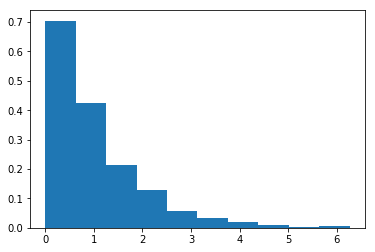

In [16]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('exp_data.csv',  delimiter=',')
plt.hist(data, density=True)
plt.show()

**6**. (20 points)

Implement Newton's method in 1D for root finding. Pass in the function and gradient as generalized function pointers. Use the method to find all roots of the polynomial equation $f(x) = x^3 - 7x - 6$. You may use the `std::abs` and `std::pow` from the `cmath` library.

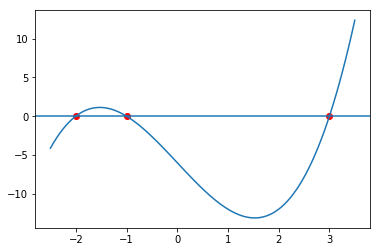

In [17]:
f = lambda x: x**3 - 7*x - 6
r = np.roots([1, 0, -7, -6])

xi = np.linspace(-2.5, 3.5, 100)
plt.plot(xi, f(xi))
plt.scatter(r, np.zeros_like(r), c='red')
plt.axhline(0)
plt.show()

In [4]:
%%file e6.cpp

#include <iostream>
#include <functional>
#include <cmath>

using std::cout;
using std::function;
using std::abs;
using std::pow;      
        
using func = function<double(double)>;

double newton(double x, func f, func g, double tol=1e-8, int max_iter=100) {
    double delta;
    for (int i=0; i<max_iter; i++) {
        delta = f(x)/g(x);
        x -= delta;
        if (abs(delta) < tol) {
            break;
        }
        if (i==max_iter) {
            cout << "Failure to converge in " << max_iter << "iterations\n";
        }
    }
    return x;
}

int main() {      

    auto f = [](double x){ return pow(x,3) - 7*x - 6; };
    auto g = [](double x){ return 3*pow(x, 2) - 7; };    
    
    cout << newton(-4, f, g) << "\n";
    cout << newton(0, f, g) << "\n";
    cout << newton(4, f, g) << "\n";
}

Overwriting e6.cpp


In [5]:
%%bash

g++ -o e6.exe e6.cpp -std=c++14

In [6]:
%%bash

./e6.exe

-2
3
3


**7**.  (30 points)

Use the Eigen library to

- Generate 10 x-coordinates linearly spaced between 10 and 15
- Generate 10 random y-values as $y = 3x^2 - 7x + 2 + \epsilon$ where $\epsilon \sim 10 N(0,1)$
- Find the length of $x$ and $y$ and the Euclidean distance between $x$ and $y$
- Find the correlation between $x$ and $y$ using
![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/60e3f3116e2923c792aafb904dcac308624a1d77)
- Solve the linear system to find a quadratic fit for this data

If you use the seed 12345 for the random number generator, you should get the following solutions.

In [21]:
x = np.array('10 10.5556 11.1111 11.6667 12.2222 12.7778 13.3333 13.8889 14.4444 15'.split()).astype('float')
y = np.array('232.862 264.056 310.697 322.345 359.037 412.095 448.471 468.163 533.646 579.763'.split()).astype('float')

In [22]:
np.linalg.norm(x), np.linalg.norm(y)

(39.84924833168124, 1290.087239415614)

In [23]:
np.linalg.norm(x-y)

1250.6696992541235

In [24]:
np.corrcoef(x, y)[0,1]

0.9940830052398306

In [25]:
X = np.c_[np.ones_like(x), x, x**2]
np.linalg.lstsq(X, y, rcond=None)[0]

array([100.9138974 , -22.66697873,   3.62437276])

In [26]:
%%file e7.cpp

#include <iostream>
#include <random>
#include <functional>
#include <Eigen/Dense>

using std::cout;
using std::default_random_engine;
using std::normal_distribution;
using std::bind;
        
default_random_engine re{12345};
normal_distribution<double> norm(0, 1);
auto rnorm = bind(norm, re);

int main() {
    using namespace Eigen;

    int n = 10;
    VectorXd x = VectorXd::LinSpaced(n, 10, 15);
    VectorXd eps = 10*VectorXd::Zero(n).unaryExpr([](double x){ return rnorm(); });
    VectorXd y = 3*x.array().pow(2) - 7*x.array() + 2 + eps.array();
    
    cout << "x: " << x.transpose() << "\n";
    cout << "y: " << y.transpose() << "\n";    
    cout << "Length of x: " << x.norm() << "\n";
    cout << "Lenght of y: " << y.norm() << "\n";
    cout << "d(x, y): " << (x-y).norm() << "\n";
    
    VectorXd xc = x.array() - x.mean();
    VectorXd yc = y.array() - y.mean();
    double sx = sqrt(1.0/(n-1)*xc.array().square().sum());
    double sy = sqrt(1.0/(n-1)*yc.array().square().sum()); 
    cout << "Corr(x, y): "  << 
    (xc.transpose() * yc)/sqrt(xc.array().square().sum() * yc.array().square().sum()) << "\n";
    
    MatrixXd A(n, 3);
    A << VectorXd::Ones(n), x, x.array().square();
    cout << "lstsq(Xb = y): "
        << A.jacobiSvd(ComputeThinU | ComputeThinV).solve(y).transpose() << "\n";
}

Overwriting e7.cpp


**NOte**: Change the location to where your eigen3 headers have been installed.

In [27]:
%%bash

g++ -o e7.exe e7.cpp -std=c++14 -I/usr/local/include/eigen3

In [28]:
%%bash

./e7.exe

x:      10 10.5556 11.1111 11.6667 12.2222 12.7778 13.3333 13.8889 14.4444      15
y: 232.862 264.056 310.697 322.345 359.037 412.095 448.471 468.163 533.646 579.763
Length of x: 39.8493
Lenght of y: 1290.09
d(x, y): 1250.67
Corr(x, y): 0.994083
lstsq(Xb = y):  100.914 -22.6666  3.62434
